In [6]:
import numpy as np

# Importing standard Qiskit libraries

from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit import QuantumCircuit, transpile, Aer, IBMQ,execute

from qiskit.quantum_info import*


from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-10-29 13:47:15,329: Credentials are already in use. The existing account in the session will be replaced.


In [2]:
qc=QuantumCircuit(2,2)
qc.h(1)
qc.cx(0,1)
qc.cx(1,0)
qc.draw()

from qiskit.quantum_info import Statevector
state=Statevector.from_int(1,4)
state=state.evolve(qc)
state.draw('latex')

<IPython.core.display.Latex object>

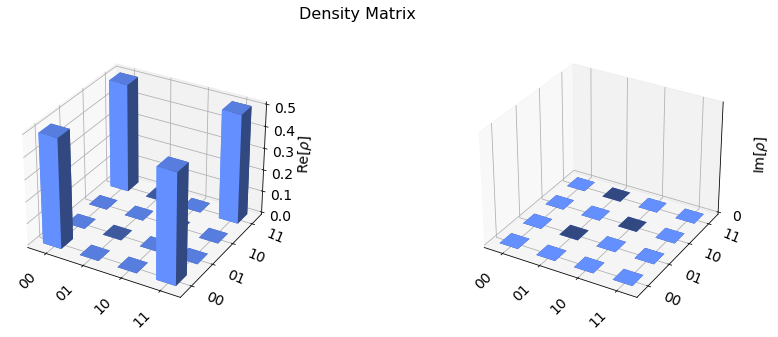

In [7]:
qc=QuantumCircuit(2,2)
qc.cx(0,1)
qc.h(1)
qc.cx(1,0)

qc.draw()

from qiskit.quantum_info import Statevector
state=Statevector.from_int(1,4)
state=state.evolve(qc)
state.draw('latex')


rho_AB = DensityMatrix.from_instruction(qc)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

from qiskit.visualization import plot_state_city
plot_state_city(rho_AB.data, title='Density Matrix')

{'10': 1024}


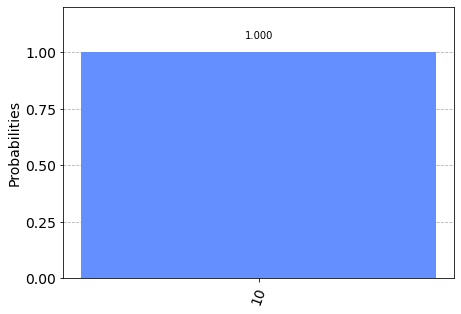

In [8]:
qc = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc.x(0) 
qc.x(1)
# use cnots to write the XOR of the inputs on qubit 2
qc.cx(0,2)
qc.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc.ccx(0,1,3)
# extract outputs
qc.measure(2,0) # extract XOR value
qc.measure(3,1) # extract AND value

qc.draw(output='mpl')
backend=Aer.get_backend('qasm_simulator')
result=execute(qc,backend=backend,shots=1024).result()
counts=result.get_counts(qc)
print(counts)
plot_histogram(counts)

In [12]:
qc=QuantumCircuit(2,2)
qc.cx(0,1)
qc.h(1)
qc.cx(1,0)
qc.draw()
state=Statevector.from_int(1,4)
state=state.evolve(qc)
state.draw('latex')
rho_AB = DensityMatrix.from_instruction(qc)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')
rho_a=partial_trace(rho_AB,[0])
display(rho_a.draw('latex'))
rho_b=partial_trace(rho_AB,[1])
display(rho_b.draw('latex'))
print(entropy(rho_a))
print(entropy(rho_b))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1.0
1.0


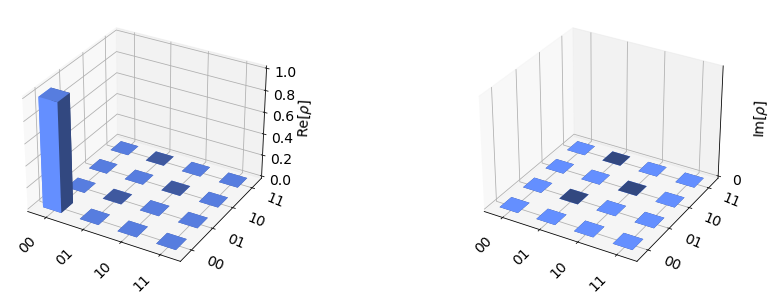

In [14]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.swap(0,1)
qc.draw()

rho_AB = DensityMatrix.from_instruction(qc)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')
Statevector(qc).draw('city')
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
qc.draw()
rho_AB = DensityMatrix.from_instruction(qc)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')
Statevector(qc).draw('city')
